***Manipulación y muestra de gaficos***

In [4]:
import sys
!{sys.executable} -m pip install --quiet matplotlib seaborn numpy

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path


# Traemos nuestro df
# df_maestro = pd.read_csv(df)
# df_maestro.info()


BASE_PATH = Path.cwd()  

CLIENTES_PATH = BASE_PATH / "Clientes_limpio.csv"
PRODUCTOS_PATH = BASE_PATH / "Productos_limpio.csv"
VENTAS_PATH = BASE_PATH / "Ventas_limpio.csv"
DETALLE_PATH = BASE_PATH / "Detalle_ventas_limpio.csv"
TABLA_MAESTRA_PATH = BASE_PATH / "Tabla_Maestra_limpia.csv"



[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: C:\Users\tumin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
def cargar_datos():
    clientes = pd.read_csv(CLIENTES_PATH)
    productos = pd.read_csv(PRODUCTOS_PATH)
    ventas = pd.read_csv(VENTAS_PATH)
    detalle = pd.read_csv(DETALLE_PATH)

    # Construcción de tabla maestra
    tabla_maestra = (
        ventas
        .merge(detalle, on="id_venta", how="left")
        .merge(clientes, on="id_cliente", how="left")
        .merge(productos, on="id_producto", how="left")
    )

    print("✅ Tabla maestra construida a partir de ventas, detalle, clientes y productos")
    print("Filas:", len(tabla_maestra))
    return tabla_maestra

# dataframe
df_maestro = cargar_datos()
print("Columnas del dataset final:")
print(df_maestro.columns.to_list())
display(df_maestro.head())


✅ Tabla maestra construida a partir de ventas, detalle, clientes y productos
Filas: 343
Columnas del dataset final:
['id_venta', 'fecha', 'id_cliente', 'nombre_cliente_x', 'email_x', 'medio_pago', 'anio', 'mes', 'trimestre', 'nombre_mes', 'id_producto', 'nombre_producto_x', 'cantidad', 'precio_unitario_x', 'importe', 'nombre_cliente_y', 'email_y', 'ciudad', 'fecha_alta', 'nombre_producto_y', 'categoria', 'precio_unitario_y']


,id_venta,fecha,id_cliente,nombre_cliente_x,email_x,medio_pago,anio,mes,trimestre,nombre_mes,...,cantidad,precio_unitario_x,importe,nombre_cliente_y,email_y,ciudad,fecha_alta,nombre_producto_y,categoria,precio_unitario_y
0,1,2024-06-19,62,guadalupe romero,guadalupe.romero@mail.com,tarjeta,2024,6,2,June,...,1,2902,2902,guadalupe romero,guadalupe.romero@mail.com,carlos paz,2023-03-03,toallas húmedas x50,higiene personal,2902
1,2,2024-03-17,49,olivia gomez,olivia.gomez@mail.com,qr,2024,3,1,March,...,5,2394,11970,olivia gomez,olivia.gomez@mail.com,rio cuarto,2023-02-18,aceitunas negras 200g,alimentos,2394
2,2,2024-03-17,49,olivia gomez,olivia.gomez@mail.com,qr,2024,3,1,March,...,5,469,2345,olivia gomez,olivia.gomez@mail.com,rio cuarto,2023-02-18,helado vainilla 1l,alimentos,469
3,2,2024-03-17,49,olivia gomez,olivia.gomez@mail.com,qr,2024,3,1,March,...,2,4061,8122,olivia gomez,olivia.gomez@mail.com,rio cuarto,2023-02-18,fernet 750ml,alimentos,4061
4,2,2024-03-17,49,olivia gomez,olivia.gomez@mail.com,qr,2024,3,1,March,...,1,2069,2069,olivia gomez,olivia.gomez@mail.com,rio cuarto,2023-02-18,medialunas de manteca,alimentos,2069


In [6]:
# Identificación de columnas con variables numericas

columnas_numericas = df_maestro.select_dtypes(include=[np.number])

columnas_numericas.head()


,id_venta,id_cliente,anio,mes,trimestre,id_producto,cantidad,precio_unitario_x,importe,precio_unitario_y
0,1,62,2024,6,2,90,1,2902,2902,2902
1,2,49,2024,3,1,82,5,2394,11970,2394
2,2,49,2024,3,1,39,5,469,2345,469
3,2,49,2024,3,1,70,2,4061,8122,4061
4,2,49,2024,3,1,22,1,2069,2069,2069


In [7]:
# corregimos los valores NaN de anio para hacer la matrix

col_num_sinanio = columnas_numericas.drop(columns=['anio'], errors='ignore')

col_num_sinanio.head()


,id_venta,id_cliente,mes,trimestre,id_producto,cantidad,precio_unitario_x,importe,precio_unitario_y
0,1,62,6,2,90,1,2902,2902,2902
1,2,49,3,1,82,5,2394,11970,2394
2,2,49,3,1,39,5,469,2345,469
3,2,49,3,1,70,2,4061,8122,4061
4,2,49,3,1,22,1,2069,2069,2069


In [8]:
# Calculo de Matriz de Correlaciones
correlation_matrix = col_num_sinanio.corr()

# Mostrar la matriz de correlaciones
correlation_matrix.head()

,id_venta,id_cliente,mes,trimestre,id_producto,cantidad,precio_unitario_x,importe,precio_unitario_y
id_venta,1.000000,-0.038641,-0.094984,-0.155218,-0.042161,0.037559,-0.094872,-0.063107,-0.094872
id_cliente,-0.038641,1.000000,0.188892,0.175493,0.033781,0.010386,-0.054787,-0.025316,-0.054787
mes,-0.094984,0.188892,1.000000,0.899573,-0.076665,0.015431,0.056883,0.072226,0.056883
trimestre,-0.155218,0.175493,0.899573,1.000000,-0.083655,0.001085,0.035973,0.056388,0.035973
id_producto,-0.042161,0.033781,-0.076665,-0.083655,1.000000,0.076373,0.002185,0.048966,0.002185


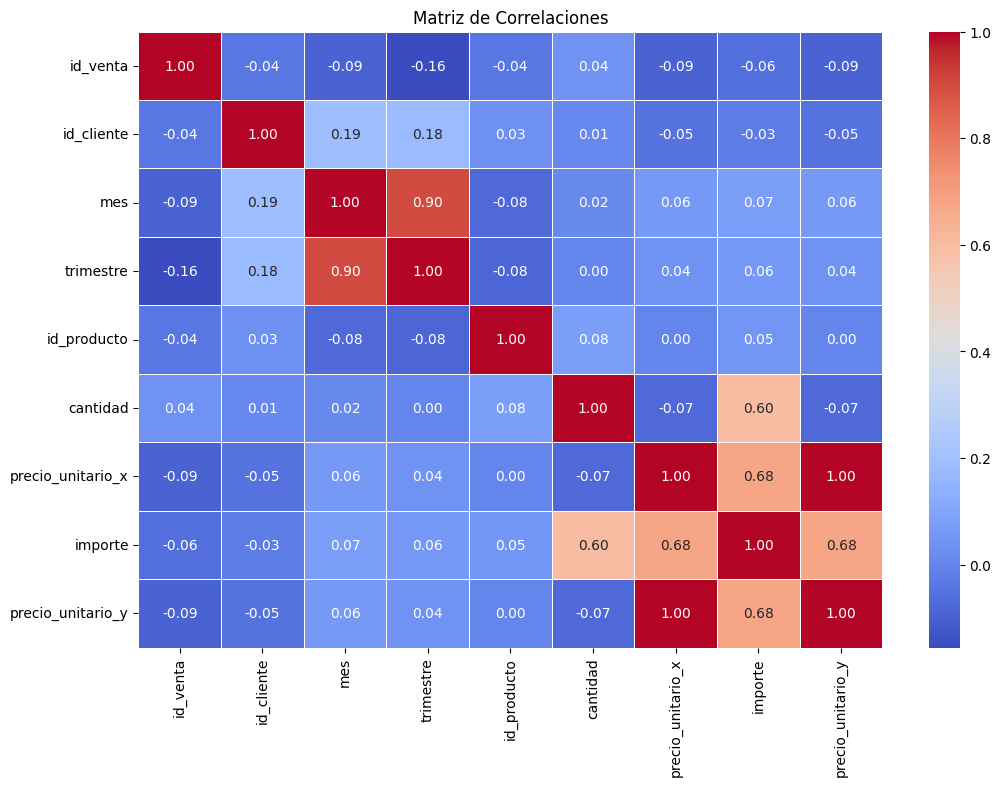

La Matriz de Correlaciones solo con variables numericas.


In [9]:
# Creamos el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

print(f"La Matriz de Correlaciones solo con variables numericas.")

### **Visualización y análisis exploratorio de datos**

#### 📊 Importe total de ventas por ciudad y mes

Este gráfico de burbujas demuestra el importe total de ventas por ciudad (eje Y) y mes (eje X).
El tamaño de la burbuja representa el monto total y el color la magnitud de ventas.
* **Propósito:**  Identificar patrones de venta y estacionalidad según cada región.
* **Finding:** Destaca Río Cuarto en el mes de mayo con el mayor importe, indicando un posible pico estacional.

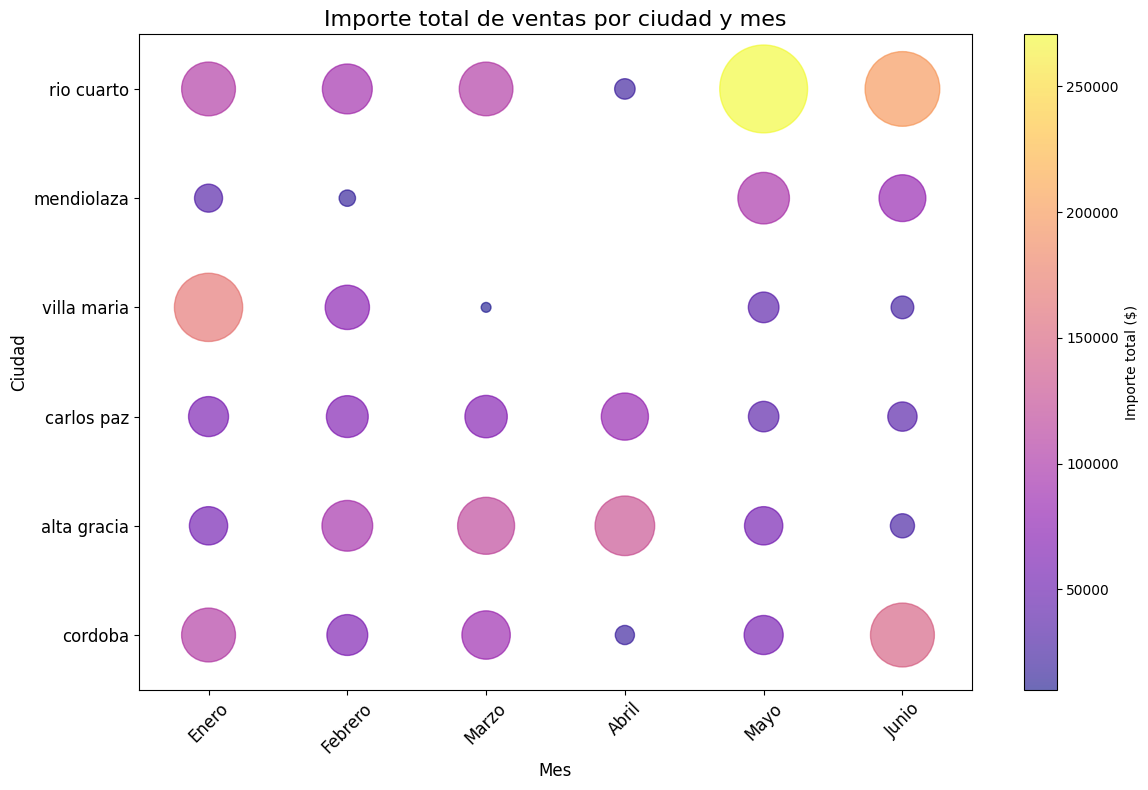

In [10]:
# Gráfico Burbujas - Importe total de ventas por ciudad y mes

ventas_burbujas = (
    df_maestro.groupby(["nombre_mes", "ciudad"], as_index=False).agg({"importe": "sum"})
)

orden_meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
ventas_burbujas["nombre_mes"] = pd.Categorical(
    ventas_burbujas["nombre_mes"],
    categories=orden_meses,
    ordered=True
)

ventas_burbujas = ventas_burbujas.sort_values("nombre_mes")

mapa_meses = {
    "January": "Enero", "February": "Febrero", "March": "Marzo", "April": "Abril",
    "May": "Mayo", "June": "Junio", "July": "Julio", "August": "Agosto",
    "September": "Septiembre", "October": "Octubre", "November": "Noviembre", "December": "Diciembre"
}
ventas_burbujas["mes_es"] = ventas_burbujas["nombre_mes"].map(mapa_meses)

# Tamaños de burbujas
tam_min, tam_max = 50, 4000  # rango
imp_min, imp_max = ventas_burbujas["importe"].min(), ventas_burbujas["importe"].max()
ventas_burbujas["tam_burbuja"] = (
    (ventas_burbujas["importe"] - imp_min) /
    (imp_max - imp_min) * (tam_max - tam_min) + tam_min
)

plt.figure(figsize=(12,8))
scatter = plt.scatter(
    ventas_burbujas["mes_es"], # eje X
    ventas_burbujas["ciudad"], # eje Y
    s=ventas_burbujas["tam_burbuja"],
    alpha=0.6,
    c=ventas_burbujas["importe"],
    cmap="plasma"
)

plt.title("Importe total de ventas por ciudad y mes", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ciudad", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(scatter, label="Importe total ($)")
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

#### 📊 Distribución de ingresos por ciudad

Este gráfico de barras horizontales muestra el importe total de ventas alcanzado por cada ciudad.
El eje Y representa las ciudades y el eje X refleja el monto total de ingresos.

* **Propósito:** Comparar el nivel de ventas entre distintas regiones y detectar concentraciones de ingresos.

* **Finding:** Destaca Río Cuarto con el mayor importe total, casi duplicando a las demás ciudades, lo que sugiere que es un lugar clave en la distribución de ventas.

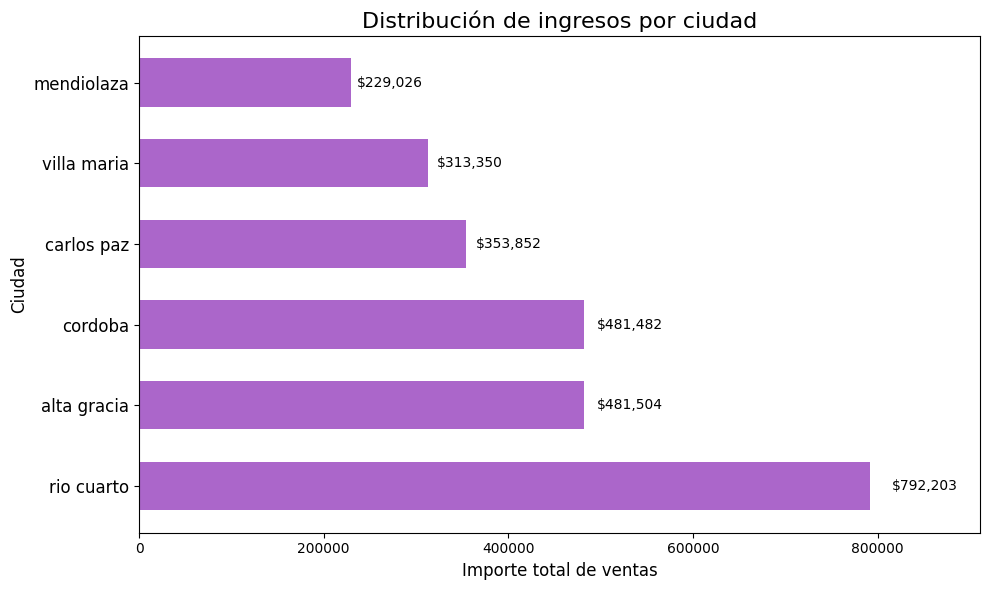

In [11]:
# Gráfico Barras - Distribución de ingresos por ciudad

ingresos_ciudad = (
    df_maestro
    .groupby("ciudad", as_index=False)
    .agg({"importe": "sum"})
    .sort_values("importe", ascending=False)
)

plt.figure(figsize=(10, 6))
plt.barh(
    ingresos_ciudad["ciudad"],
    ingresos_ciudad["importe"],
    color="#ab66ca",
    height=0.6
)
plt.xlabel("Importe total de ventas", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Ciudad", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribución de ingresos por ciudad", fontsize=16)

# Etiqueta de datos
for i, nro in enumerate(ingresos_ciudad["importe"]):
    plt.text(nro + (nro * 0.03), i, f"${nro:,.0f}", va="center", ha="left", fontsize=10)

# Modificación margen del lienzo
plt.xlim(0, ingresos_ciudad["importe"].max() * 1.15)

plt.tight_layout()
plt.show()


#### 📊 Frecuencia de compra de los clientes

Este histograma muestra cuántas veces los clientes han realizado compras dentro del periodo analizado de datos.
El eje X representa el número de compras por cliente y el eje Y indica la cantidad de clientes en cada rango de frecuencia.

* **Propósito:** Analizar los hábitos de compra y medir la recurrencia de los clientes.

* **Finding:** La mayoría de los clientes realiza entre 3 y 5 compras, mostrando un patrón de compra moderadamente recurrente, mientras que pocos alcanzan +10 compras.

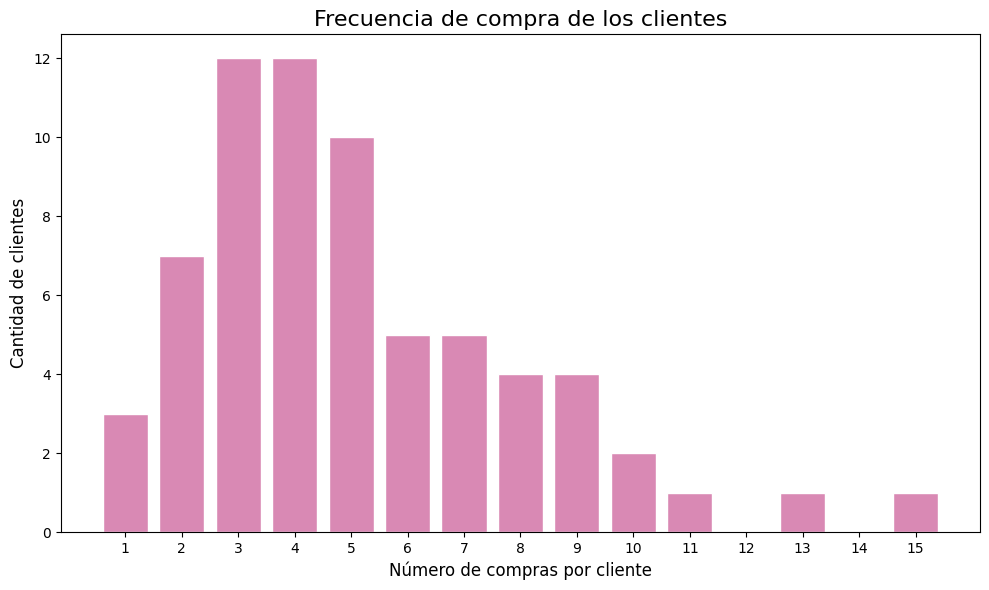

In [12]:
# Histograma - Frecuencia de compra de los clientes

col_cliente = "id_cliente"

frecuencia = (
    df_maestro
    .groupby(col_cliente)
    .agg(num_compras=("importe", "count"))
)

plt.figure(figsize=(10, 6))
plt.hist(
    frecuencia["num_compras"],
    bins=range(1, frecuencia["num_compras"].max() + 2),
    align="left",
    rwidth=0.8,
    color="#d989b4",
    edgecolor="white"
)

plt.xlabel("Número de compras por cliente", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.xticks(range(1, frecuencia["num_compras"].max() + 1), fontsize=10)
plt.yticks(fontsize=10)
plt.title("Frecuencia de compra de los clientes", fontsize=16)

plt.tight_layout()
plt.show()
